In [1]:
import sys
import os
import pandas
import copy
sys.path.append("..")
from diachr import DiachromaticInteractionSet
from diachr import BaitedDigest
from diachr import BaitedDigestSet

# Interactions at baited digests - Scatterplots

The classes ``BaitedDigest`` and ``BaitedDigestSet`` allows to investigate interactions at individual baited digests. More explanation and application examples can be found in this Jupyter notebook:

```
notebooks/interactions_at_baited_digests_1.ipynb
```

The data structure ``BaitedDigestSet`` makes it easy to calculate ``(NE,EN)`` number pairs for each bait. In this notebook, we determine ``(NE,EN)`` number pairs of the following types:

1. Interaction numbers
2. Read pair numbers
3. Median read pair numbers
4. Median distances

and visualize them in scatterplots.

## Input file

In [7]:
CELL_TYPE_SHORT = 'MAC_M0'
PROTOCOL = 'CHC'
MIN_I_DIST = '20000'
if PROTOCOL == 'CHC':
    MIN_I_DIST = '20000'
RPC_RULE = 'ht'
FDR = '05'
if PROTOCOL == 'CHC':
    INTERACTION_FILE = '../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/CHC/JAV_' + CELL_TYPE_SHORT + '_RALT_20000_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_CHC_RALT_' + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC_POOLED':
    INTERACTION_FILE = '../DICer_interactions/HT/FDR005/HC/20000/JAV_ALL_HC_RALL_ALT_20000_ht_fdr0.05_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + 'POOLED_HC_FDR005' + '_HC_RALT_20000_' + RPC_RULE.lower()
if PROTOCOL == 'HC':
    INTERACTION_FILE = '../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/HC/' + MIN_I_DIST + '/JAV_' + CELL_TYPE_SHORT + '_HC_RALT_' + MIN_I_DIST + '_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_HC_RALT_'  + MIN_I_DIST + '_' + RPC_RULE.lower()

In [2]:
# Interactions on 'chr21' and 'chr22' only
INTERACTION_FILE = "../tests/data/baited_digests_d11_interaction_test_file.tsv.gz"
OUT_PREFIX = "TEST_FILE_1"

## Create  ``BaitedDigestSet``

In [8]:
# Create DiachromaticInteractionSet
d11_interaction_set = DiachromaticInteractionSet(rpc_rule = 'ht')
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    verbose = True)
# Create BaitedDigestSet
baited_digest_set = BaitedDigestSet()
read_interactions_info_dict = baited_digest_set.ingest_interaction_set(d11_interaction_set, verbose=True)
print(baited_digest_set.get_ingest_interaction_set_info_report())

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../DICer_interactions/HT/FDR005/CHC/JAV_MAC_M0_RALT_20000_ht_fdr0.05_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Parsed 3,000,000 interaction lines ...
	[INFO] Parsed 4,000,000 interaction lines ...
	[INFO] Parsed 5,000,000 interaction lines ...
	[INFO] Parsed 6,000,000 interaction lines ...
	[INFO] Parsed 7,000,000 interaction lines ...
	[INFO] Parsed 8,000,000 interaction lines ...
	[INFO] Parsed 9,000,000 interaction lines ...
	[INFO] Set size: 9,648,210
[INFO] ... done.
[INFO] Reading interactions and group them according to chromosomes and baited digests ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Read 2,000,000 interactions ...
	[INFO] Read 3,000,000 interactions ...
	[INFO] Read 4,000,000 interactions ...
	[INFO] Read 5,000,000 interactions ...
	[INFO] Read 6,000,000 interactions ...
	[INFO] Read 7,000,000 intera

## Interaction numbers

### Determine number pairs

The function ``baited_digest_set.get_number_pairs_at_baits()`` can be used to determine number pairs of all types. In order to determine pairs of interaction numbers, the function must be called with the argument ``number_pair_type='I_NUM'``. In addition, the analysis can be restricted to subsets of chromosomes by passing a list with the corresponding chromosome names.

The results are returned in form of a dictionary, which contains the number pairs, separated according to the different interaction categories. Furthermore, the dictionary contains a list of chromosomes that have been taken into account, the associated number of baits, and the type of the pairs (use ``i_num_pair_dict.keys()`` to explore the dictionary).

In [9]:
i_num_pair_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='I_NUM',
    #chromosomes=['chr21', 'chr22'],
    verbose=True
)

[INFO] Determining pairs of interaction numbers (to the left and right) at baits ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr21 ...
	[INF

### Visualze pairs in scatterplots

The function ``get_pair_scatter_plots_with_histograms()`` can be used to graphically represent number pairs of any type. To do this, the previously created dictionary with the number pairs is passed to this function. In adddition, two text fields can be set and the name of the PDF file to which the plot will be written can be specified.

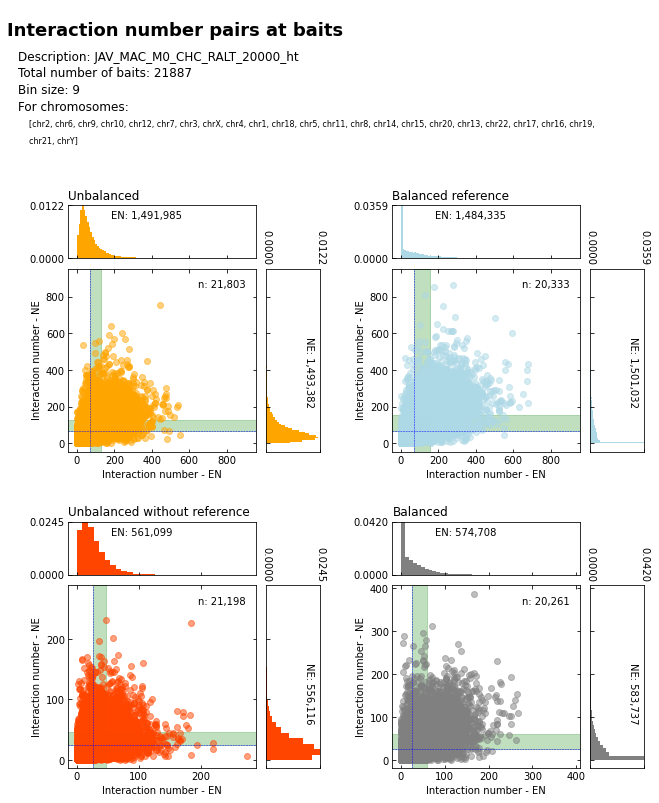

In [14]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = i_num_pair_dict,
    draw_mean_and_sd = True,
    #set_xy_max = 70,
    #plot_all_instead_of_ui=True,
    sup_title = 'Interaction number pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_i_num_pairs_scatter_plots_with_histograms.pdf'
)

## Read pair numbers

For the read pair counts it works the same way as for the interaction counts. However, the argument `number_pair_type='RP_NUM'` must be used.

In [15]:
rp_num_pairs_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='RP_NUM',
    #chromosomes=['chr22']
    verbose = True
)

[INFO] Determining pairs of read pair numbers (to the left and right) at baits ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr21 ...
	[INFO]

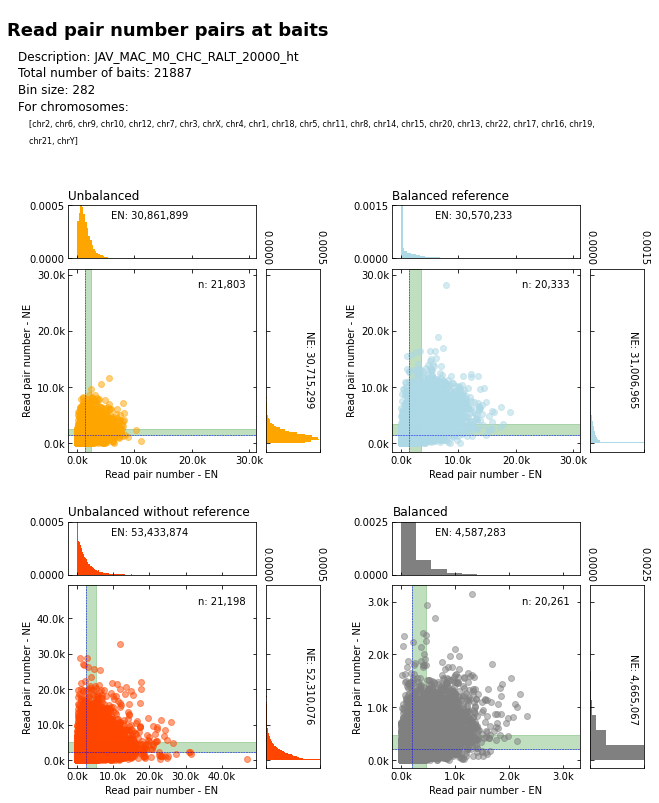

In [18]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = rp_num_pairs_dict,
    draw_mean_and_sd=True,
    #set_xy_max = 5000,
    #plot_all_instead_of_ui=True,
    sup_title = 'Read pair number pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_rp_num_pairs_scatter_plots_with_histograms.pdf'
)

## Median read pair numbers

For the median read pair counts it works the same way as before. However, the argument `number_pair_type='MED_RP_NUM'` must be used.

In [8]:
med_rp_num_pairs_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='MED_RP_NUM',
    #chromosomes=['chr22']
    verbose = True
)

[INFO] Determining pairs of median read pair numbers (to the left and right) at baits ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr21 ...


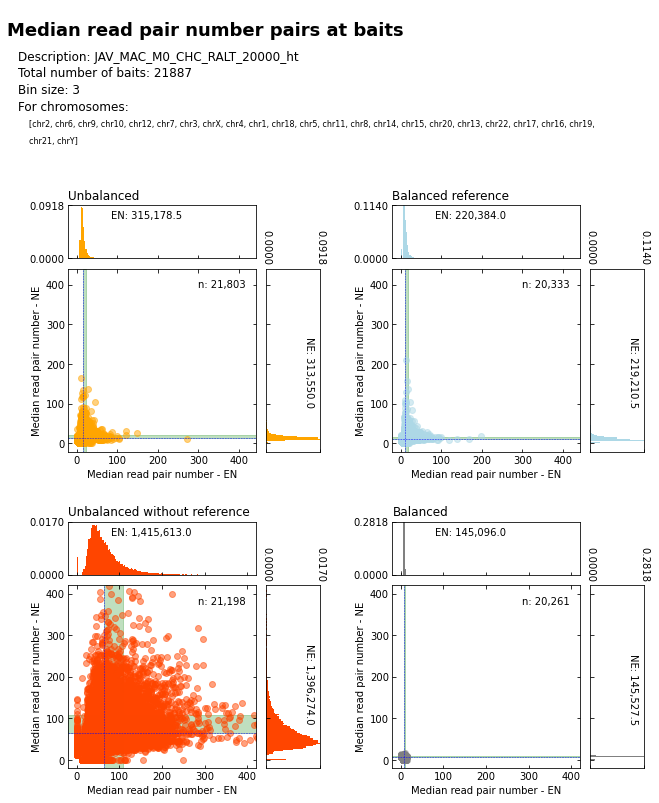

In [9]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = med_rp_num_pairs_dict,
    draw_mean_and_sd=True,
    set_xy_max = 400,
    sup_title = 'Median read pair number pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_med_rp_num_pairs_scatter_plots_with_histograms.pdf'
)

## Median interaction distances

For the median read pair counts it works the same way as before. However, the argument `number_pair_type='MED_I_DIST'` must be used.

In [10]:
med_i_dist_pair_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='MED_I_DIST',
    #chromosomes=['chr22'],
    verbose = True
)

[INFO] Determining pairs of median interaction distances (to the left and right) at baits ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr21 

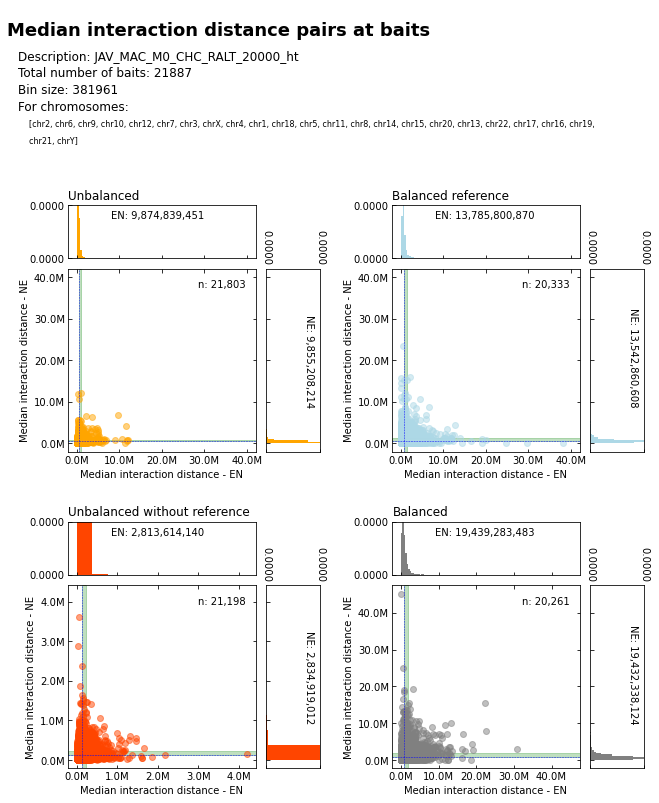

In [11]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = med_i_dist_pair_dict,
    draw_mean_and_sd=True,
    #set_xy_max = 3000000,
    sup_title = 'Median interaction distance pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_med_i_dist_pairs_scatter_plots_with_histograms.pdf'
)